In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(100)

In [3]:
#load the data_set into the dataframe
pima_df=pd.read_csv("F:\Syed Issam Bukhari\Diabetes Detection\Data\Processed_Data\diabetes.csv",index_col=0)


In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               633 non-null    int64  
 1   Glucose                   633 non-null    float64
 2   BloodPressure             633 non-null    float64
 3   SkinThickness             633 non-null    float64
 4   Insulin                   633 non-null    float64
 5   BMI                       633 non-null    float64
 6   DiabetesPedigreeFunction  633 non-null    float64
 7   Age                       633 non-null    float64
 8   Outcome                   633 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 49.5 KB


In [5]:
#checking for null values
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,37.0,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,37.0,26.6,0.351,31.0,0.0
2,8,183.0,64.0,23.0,37.0,23.3,0.672,32.0,0.0
3,1,89.0,72.0,23.0,94.0,28.1,0.167,29.0,0.0
5,5,116.0,74.0,23.0,37.0,25.6,0.201,30.0,0.0


In [7]:
#Converting age and outcomes to int
pima_df[['Age','Outcome']]=pima_df[['Age','Outcome']].astype('int')

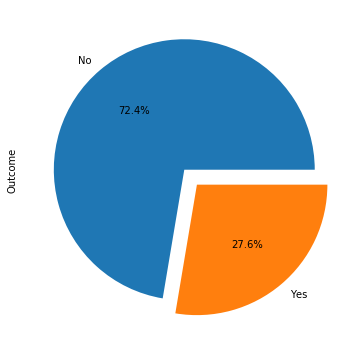

In [8]:
#Visualizing the outcome
pima_df.Outcome.value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',explode=(0,0.15),labels=['No','Yes']);

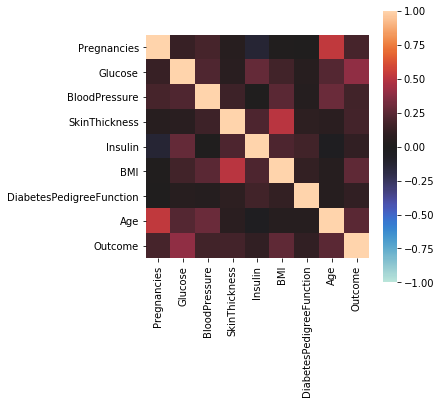

In [9]:
#Correlation between variables
corr=pima_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(data=corr,vmin=-1,vmax=1,center=0,square=True)


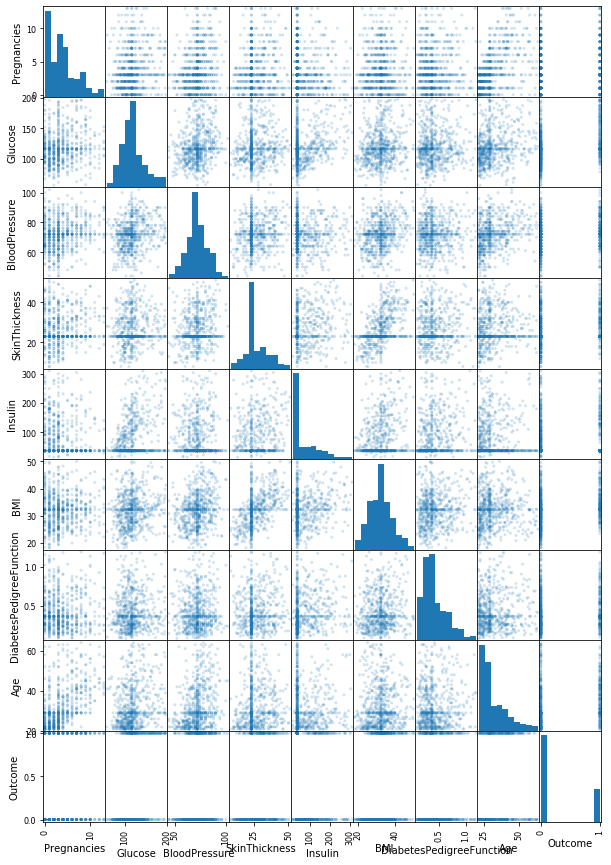

In [12]:
# There is not a lot of correlation between the variables,They are independent of each other
pd.plotting.scatter_matrix(pima_df, alpha=0.2, figsize=(10, 15));


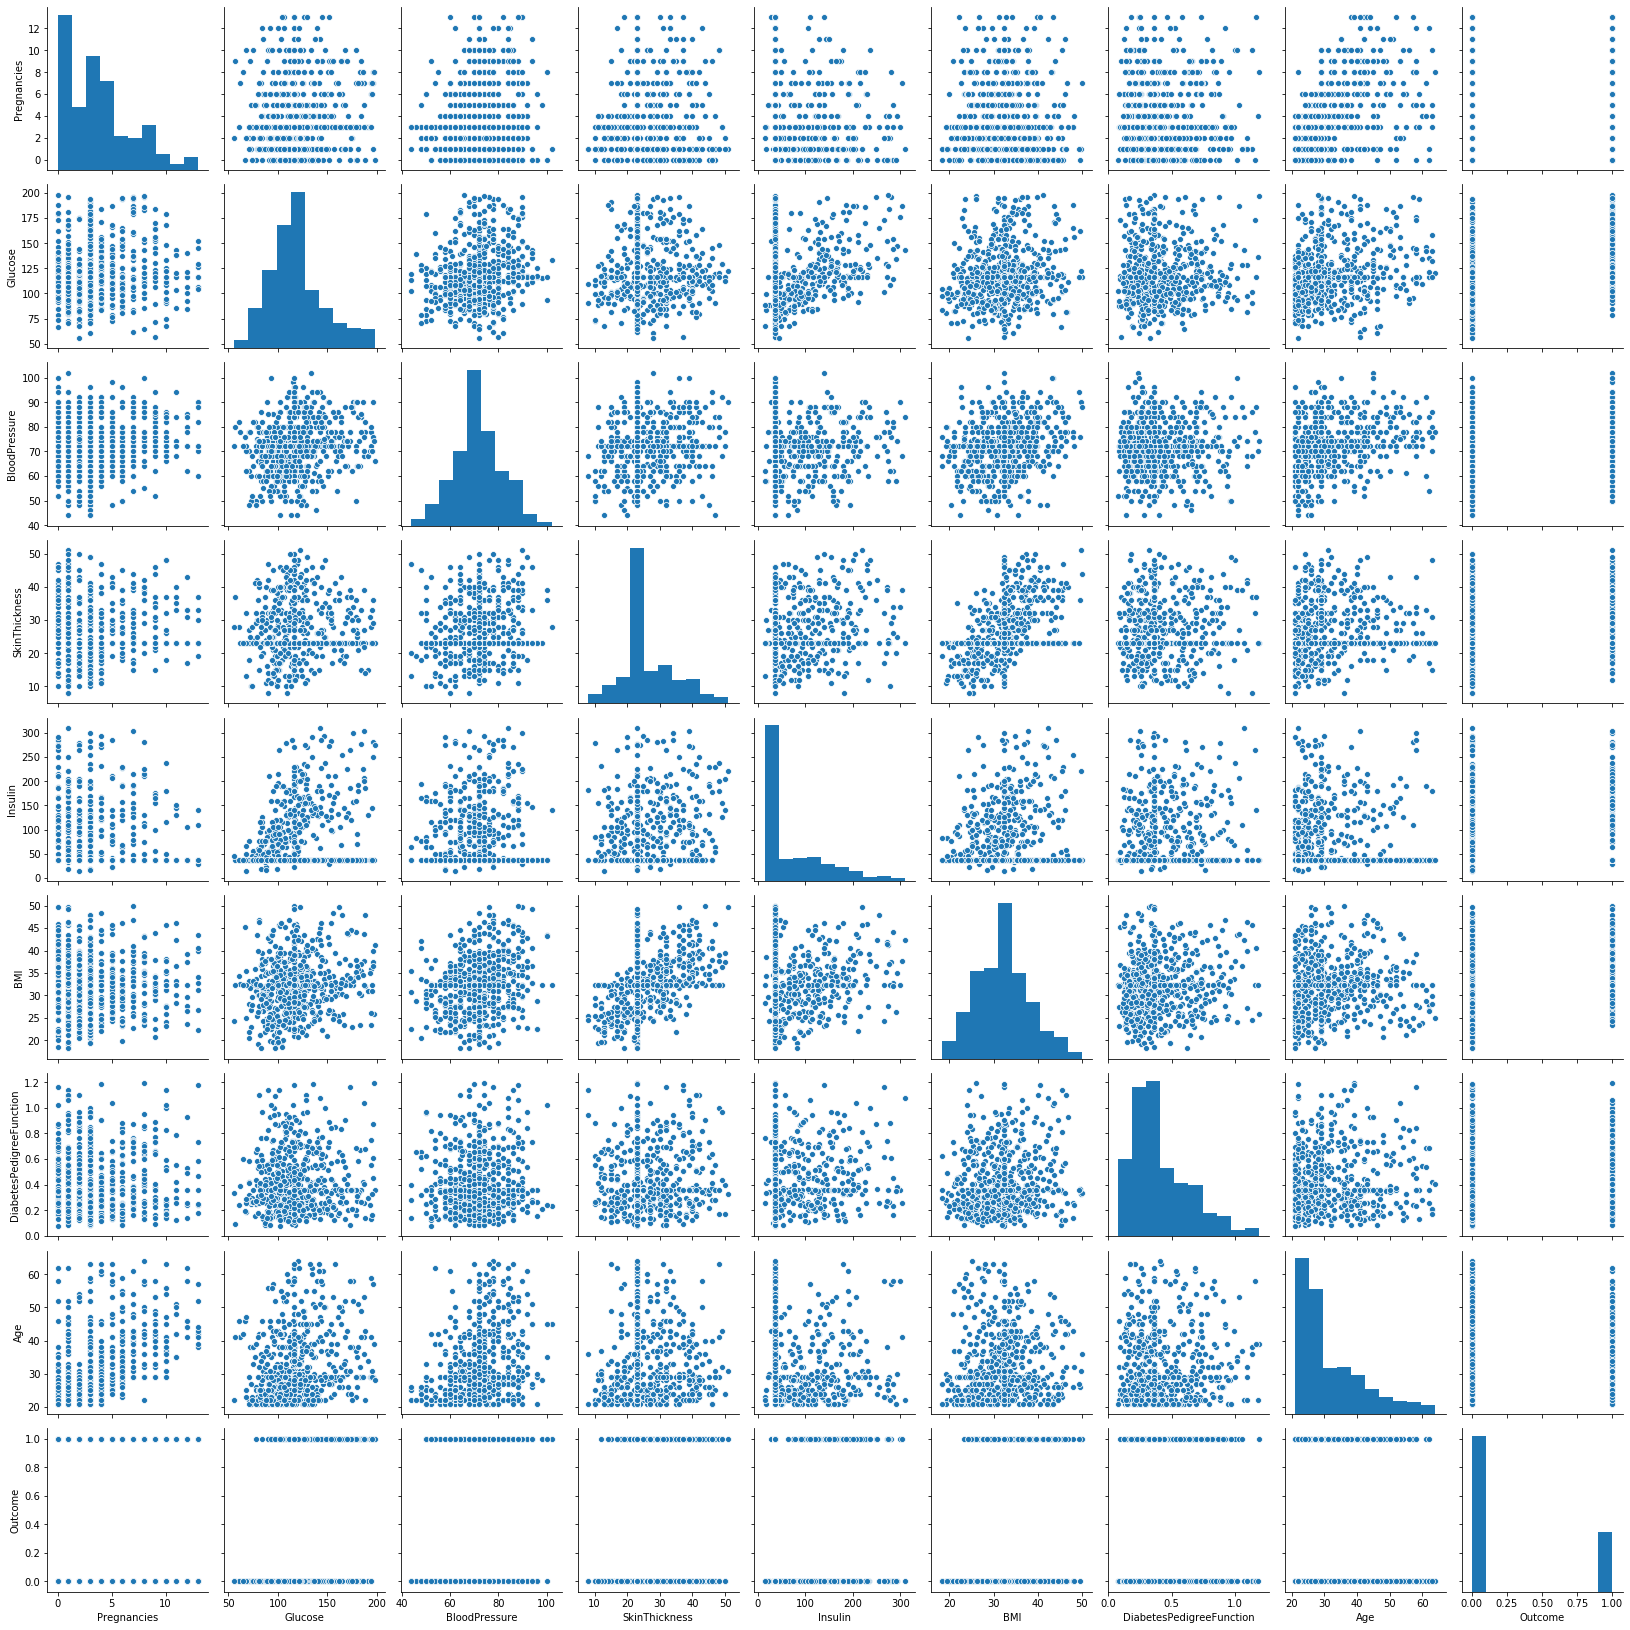

In [11]:
#pairplot
sns.pairplot(pima_df)


## Getting the feature importance

In [13]:
X = pima_df.iloc[:,0:7]  #independent columns
y = pima_df.iloc[:,-1]    #target column i.e languages
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(X,y)
print(ET.feature_importances_)
print(ET)

[0.12732718 0.24076139 0.13205818 0.10721294 0.08935438 0.15917972
 0.14410622]
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


Matplotlib is building the font cache using fc-list. This may take a moment.


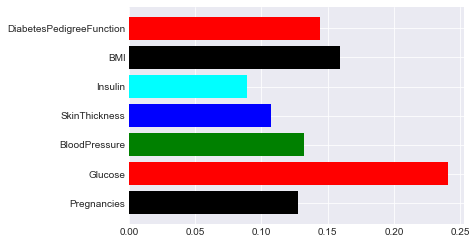

In [15]:
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ET.feature_importances_, index=X.columns)
plt.style.use('seaborn-darkgrid')
mycolors=['black', 'red', 'green', 'blue', 'cyan']
plt.barh(X.columns,ET.feature_importances_,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()